Oppgave 1

In [42]:
library(rvest)

In [43]:
library(tidyverse)

In [44]:
library(ggplot2)

In [45]:
tag <- read_html("https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132")

In [46]:
tag

{html_document}
<html lang="nb-no">
[1] <head>\n<title>Så mye rekkevidde gikk tapt i vinterkulda</title>\n<meta n ...
[2] <body class="article site_motor section_aktuelt  ">\n<!-- Google Tag Mana ...

In [71]:
rekkevidde <- html_table(html_nodes(tag, "table")[[1]], header = TRUE)

In [48]:
head(rekkevidde)

Modell (temp. varierte fra 0° til -10°),WLTP-tall,STOPP,Avvik
<chr>,<chr>,<chr>,<chr>
Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"
Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %"


In [72]:
rekkevidde2 <- subset(rekkevidde, !STOPP=="x")

In [50]:
head(rekkevidde2)

Modell (temp. varierte fra 0° til -10°),WLTP-tall,STOPP,Avvik
<chr>,<chr>,<chr>,<chr>
Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"
Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %"


In [73]:
rekkevidde2 <- rekkevidde2 %>% rename(WLTP = 'WLTP-tall')

In [74]:
rekkevidde2$STOPP <- gsub("km", "", as.character(rekkevidde2$STOPP))

In [75]:
rekkevidde2$Avvik <- gsub("%", "", as.character(rekkevidde2$Avvik))

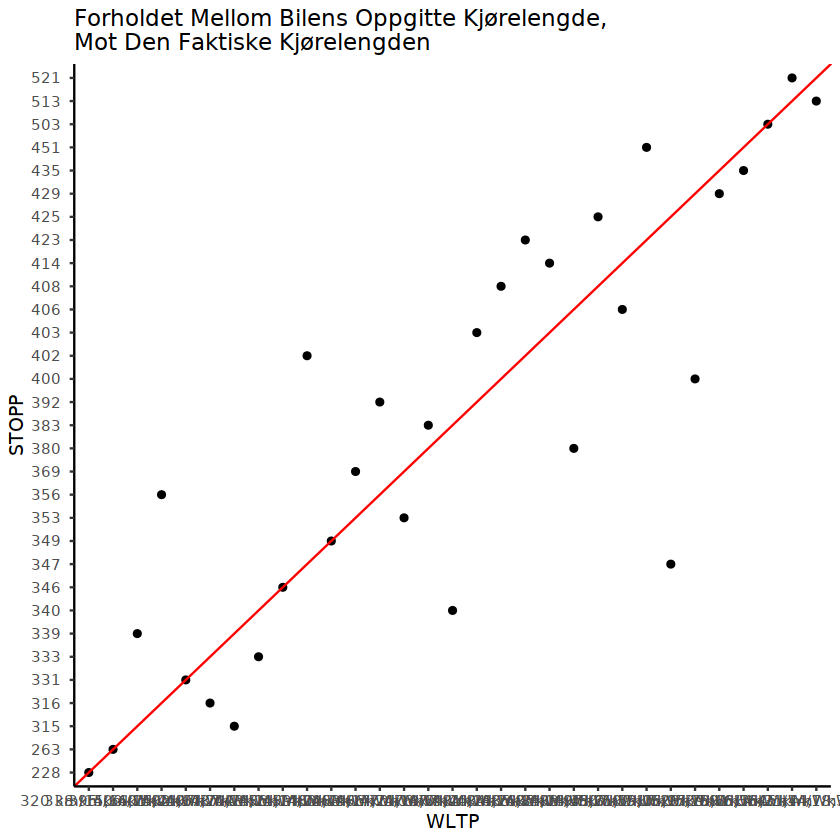

In [81]:
ggplot(rekkevidde2, aes(WLTP, STOPP)) + geom_point() + theme_classic() + geom_abline(intercept = 0, slope = 1, size = 0.5, color="red")+
ggtitle("Forholdet Mellom Bilens Oppgitte Kjørelengde,
Mot Den Faktiske Kjørelengden")

Det de sjekket i denne figuren var forskjellen mellom det de sa rekkeviddene til de forskjellige bilene var og hva den faktisk var.
Her kan man jo se at de som er over den røde linjen betyr at de er over den forventede kjørelengden, og de som er under linjen er ikke det.